In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

from scipy.stats import iqr
from scipy.stats import wilcoxon
from uoineuro.classification_utils import plot_basal_ganglia_coefs

In [12]:
file_name = 'left_right_basal_ganglia_10f_00_01.h5'

In [13]:
results_path = os.path.join(os.environ['HOME'],
                            'fits/uoineuro/classification',
                            file_name)

In [14]:
results = h5py.File(results_path, 'r')

In [15]:
list(results)

['gp', 'snr']

In [16]:
gp_baseline_coefs = results['gp/baseline/coefs'][:]
gp_uoi_coefs = results['gp/uoi/coefs'][:]
snr_baseline_coefs = results['snr/baseline/coefs'][:]
snr_uoi_coefs = results['snr/uoi/coefs'][:]

Text(0.5, 1, '\\textbf{UoI}')

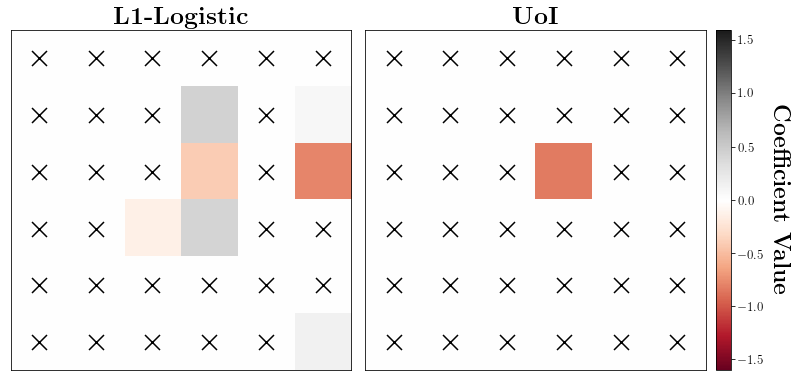

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 12))

_, _, baseline_img, uoi_img = plot_basal_ganglia_coefs(
    snr_baseline_coefs,
    snr_uoi_coefs,
    row_columns=(6, 6),
    fax=(fig, axes),
    vmin=-1.6,
    vmax=1.6
)

plt.tight_layout()

cax = fig.add_axes([1.0, 0.3035, 0.02, 0.394])
cb = fig.colorbar(baseline_img, cax=cax, orientation='vertical')
cb.ax.tick_params(labelsize=13)
cb.set_label(r'\textbf{Coefficient Value}',
             labelpad=25,
             rotation=270,
             fontsize=23)
axes[0].set_title(r'\textbf{L1-Logistic}', fontsize=25)
axes[1].set_title(r'\textbf{UoI}', fontsize=25)
# plt.savefig('snr_coefficient_values.pdf', bbox_inches='tight')

Text(290.54545454545456, 0.5, '\\textbf{UoI}')

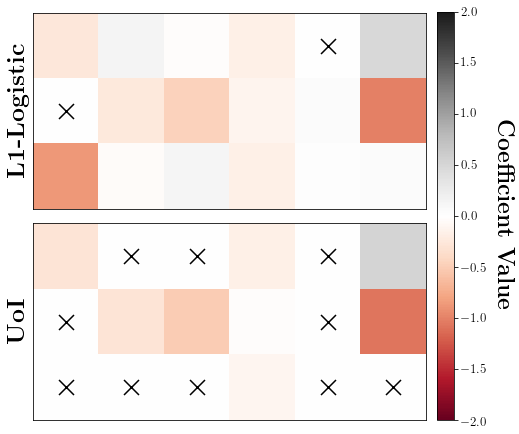

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

_, _, baseline_img, uoi_img = plot_basal_ganglia_coefs(
    gp_baseline_coefs,
    gp_uoi_coefs,
    row_columns=(3, 6),
    fax=(fig, axes),
    vmin=-2,
    vmax=2
)

plt.tight_layout()

cax = fig.add_axes([0.74, 0.033, 0.02, 0.945])
cb = fig.colorbar(baseline_img, cax=cax, orientation='vertical')
cb.ax.tick_params(labelsize=13)
cb.set_label(r'\textbf{Coefficient Value}',
             labelpad=25,
             rotation=270,
             fontsize=23)

axes[0].set_ylabel(r'\textbf{L1-Logistic}', fontsize=25)
axes[1].set_ylabel(r'\textbf{UoI}', fontsize=25)
# plt.savefig('gp_coefficient_values.pdf', bbox_inches='tight')

In [19]:
# selection ratios
gp_baseline_srs = np.count_nonzero(gp_baseline_coefs, axis=1) / gp_baseline_coefs.shape[1]
gp_uoi_srs = np.count_nonzero(gp_uoi_coefs, axis=1) / gp_baseline_coefs.shape[1]
snr_baseline_srs = np.count_nonzero(snr_baseline_coefs, axis=1) / snr_baseline_coefs.shape[1]
snr_uoi_srs = np.count_nonzero(snr_uoi_coefs, axis=1) / snr_baseline_coefs.shape[1]

In [20]:
# scores
gp_baseline_acc = results['gp/baseline/scores'][:]
gp_uoi_acc = results['gp/uoi/scores'][:]
snr_baseline_acc = results['snr/baseline/scores'][:]
snr_uoi_acc = results['snr/uoi/scores'][:]

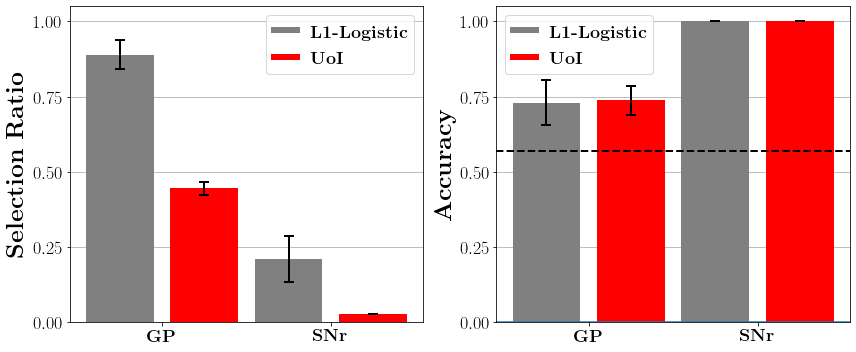

In [21]:
# plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# selection ratio plot
axes[0].bar(
    x=[0, 1, 2, 3],
    height=[np.median(gp_baseline_srs), np.median(gp_uoi_srs), np.median(snr_baseline_srs), np.median(snr_uoi_srs)],
    width=0.8,
    color=['gray', 'red', 'gray', 'red'],
    yerr=[iqr(gp_baseline_srs) / 2., iqr(gp_uoi_srs) / 2., iqr(snr_baseline_srs) / 2., iqr(snr_uoi_srs) / 2.],
    error_kw={'capsize': 5, 'elinewidth': 2, 'capthick': 2}
)

# accuracy plot
axes[1].bar(
    x=[0, 1, 2, 3],
    height=[np.median(gp_baseline_acc), np.median(gp_uoi_acc), np.median(snr_baseline_acc), np.median(snr_uoi_acc)],
    width=0.8,
    color=['gray', 'red', 'gray', 'red'],
    yerr=[iqr(gp_baseline_acc) / 2., iqr(gp_uoi_acc) / 2., iqr(snr_baseline_acc) / 2., iqr(snr_uoi_acc) / 2.],
    error_kw={'capsize': 5, 'elinewidth': 2, 'capthick': 2}
)

# chance
axes[1].axhline(y=106./186, xmin=0, xmax=1,
                linestyle='--',
                linewidth=2,
                color='black')

# plot labels
axes[0].set_ylabel(r'\textbf{Selection Ratio}', fontsize=25)
axes[1].set_ylabel(r'\textbf{Accuracy}', fontsize=25)

# cosmetic + legend
for ax in axes:
    # limits
    ax.set_ylim([0, 1.05])
    
    # ticks
    ax.set_xticks([0.5, 2.5])
    ax.set_xticklabels([r'\textbf{GP}', r'\textbf{SNr}'], fontsize=18)
    ax.set_yticks([0, 0.25, 0.50, 0.75, 1.])
    
    # legend labels
    ax.plot([], color='gray', label=r'\textbf{L1-Logistic}')
    ax.plot([], color='r', label=r'\textbf{UoI}')
    lgd = ax.legend(loc='best', prop={'size': 18},
                    handletextpad=0.7,
                    handlelength=1.3)
    for line in lgd.get_lines():
        line.set_linewidth(6.0)

    # gridlines
    ax.grid('on', axis='y')
    ax.set_axisbelow(True)
    
    ax.tick_params(labelsize=18)
    
axes[1].axhline()

plt.tight_layout()
# plt.savefig('basal_ganglia_metrics.pdf', bbox_inches='tight')

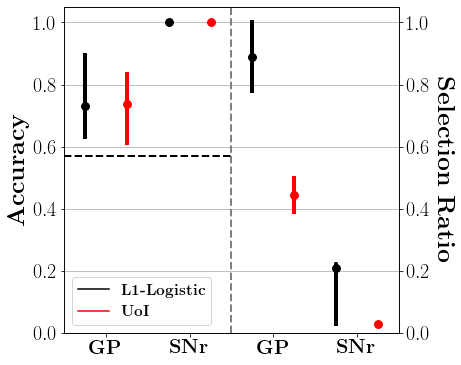

In [14]:
# alternative plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.boxplot(
    positions=[0, 2],
    x=[gp_baseline_acc, snr_baseline_acc],
    widths=0,
    boxprops={'linewidth': 4, 'color': 'k'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'k'},
    whiskerprops={'linewidth': 4, 'color': 'k'},
    showfliers=False,
)

ax.boxplot(
    positions=[1, 3],
    x=[gp_uoi_acc, snr_uoi_acc],
    widths=0,
    boxprops={'linewidth': 4, 'color': 'r'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'r'},
    whiskerprops={'linewidth': 4, 'color': 'r'},
    showfliers=False
)

ax.boxplot(
    positions=[4, 6],
    x=[gp_baseline_srs, snr_baseline_srs],
    widths=0,
    boxprops={'linewidth': 4, 'color': 'k'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'k'},
    whiskerprops={'linewidth': 4, 'color': 'k'},
    showfliers=False
)

ax.boxplot(
    positions=[5, 7],
    x=[gp_uoi_srs, snr_uoi_srs],
    widths=0,
    boxprops={'linewidth': 4, 'color': 'r'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'r'},
    whiskerprops={'linewidth': 4, 'color': 'r'},
    showfliers=False
)

ax.grid('on', axis='y')
ax.axvline(
    x=3.5,
    linestyle='--',
    linewidth=2,
    color='gray')
ax.axhline(
    y=106./186, xmin=0, xmax=0.5,
    linestyle='--',
    linewidth=2,
    color='black')

ax.set_xticks([0.5, 2.5, 4.5, 6.5])
ax.set_xticklabels([r'\textbf{GP}', r'\textbf{SNr}', r'\textbf{GP}', r'\textbf{SNr}'])

ax2 = ax.twinx()

ax.set_ylim([0, 1.05])
ax2.set_ylim([0, 1.05])

ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)

ax.set_ylabel(r'\textbf{Accuracy}', fontsize=25)
ax2.set_ylabel(r'\textbf{Selection Ratio}',
               fontsize=25,
               labelpad=25,
               rotation=270)

ax.plot([], [], color='k', label=r'\textbf{L1-Logistic}')
ax.plot([], [], color='r', label=r'\textbf{UoI}')
ax.legend(loc=3,
          prop={'size': 15.5})

plt.savefig('basal_ganglia_metrics_summary.pdf', bbox_inches='tight')

In [19]:
# statistical tests

print('Selection Ratio, Consonants:', wilcoxon(x=gp_baseline_srs, y=gp_uoi_srs))
print('Selection Ratio, Vowels:', wilcoxon(x=snr_baseline_srs, y=snr_uoi_srs))
print('Accuracy, Consonants:', wilcoxon(x=gp_baseline_acc, y=gp_uoi_acc))
print('Accuracy, Vowels:', wilcoxon(x=snr_baseline_acc, y=snr_uoi_acc))

Selection Ratio, Consonants: WilcoxonResult(statistic=0.0, pvalue=0.005033508200606249)
Selection Ratio, Vowels: WilcoxonResult(statistic=4.0, pvalue=0.023682208087507407)
Accuracy, Consonants: WilcoxonResult(statistic=16.0, pvalue=0.7786403373808597)
Accuracy, Vowels: WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)


/home/psachdeva/anaconda3/envs/neuro/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
